# Multi-layer Perceptron
<div align='right'> Hoe Sung Ryu ( 류 회 성 ) </div>
<div align='right'> Minsuk Sung ( 성 민 석) </div>

<img src=https://i.ytimg.com/vi/ahF9T7pYy3U/maxresdefault.jpg width=70%>


    
> Author: Hoe Sung Ryu, Minsuk Sung  <p>
> Tel: 010-6636-7275 / skainf23@gamil.com // 010-5134-3621 / minsuksung@korea.ac.kr <p>
> 본 내용은 파이토치를 활용한 딥러닝 과외 자료입니다. 본 내용을 제작자의 동의없이 무단으로 복제하는 행위는 금합니다.
    

---

Syllabus
    
|Event Type|Date|Topic|
|--:|:---:|:---|
|1 |July 27| Environment setting and Python basic|
|2 |July 28| Pytorch basic and Custom Data load |
|3 |July 29| Traditional Machine Learning(1) |
|4 |July 30| Traditional Machine Learning(2) |
|5 |July 31| CNN(Convolutional Neural Network)(1)  |
|6 |Aug 03| CNN(Convolutional NeuralNetwork)(2) |
|7 |Aug 04|  RNN(Recurrent Neural Networks)(1) |
|8 |Aug 05|  RNN(Recurrent Neural Networks)(2) |
|9 |Aug 06|  Transfer learning(VGG pertained on ImageNEt for CIfar-10)| 
|10|Aug 07|**Mini_Kaggle**: Facial Expression Recognition on `AffectNet` | 
|11|Aug 08|`Awards` and `Closing`| 


<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Multi-layer-Perceptron" data-toc-modified-id="Multi-layer-Perceptron-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Multi-layer Perceptron</a></span></li><li><span><a href="#Dataset-and-DatasetLoader" data-toc-modified-id="Dataset-and-DatasetLoader-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Dataset and DatasetLoader</a></span></li><li><span><a href="#Model" data-toc-modified-id="Model-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Model</a></span></li><li><span><a href="#Model-Compile" data-toc-modified-id="Model-Compile-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Model Compile</a></span></li><li><span><a href="#Loss-and-optimizer" data-toc-modified-id="Loss-and-optimizer-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Loss and optimizer</a></span></li><li><span><a href="#Model-Train-and-Evaluation" data-toc-modified-id="Model-Train-and-Evaluation-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Model Train and Evaluation</a></span></li><li><span><a href="#Visulization" data-toc-modified-id="Visulization-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Visulization</a></span></li></ul></div>

## Multi-layer Perceptron

Let’s look at how to build a Multi-Layer-Perceptron(MLPs) model. 
Unlike the single-layer perceptron, the MLP models have hidden layers in between the input and the output layers. After every hidden layer, an activation function is applied to introduce non-linearity. 
Below is an example MLP model I built.

<img src='../img/MLP.png' width=60%>
<br>

For this example, I only put one hidden layer but you can add as many hidden layers as you want. 

In `1st the hidden layer`, `ReLU` are used as activation before the information is sent to the `2nd layer`.
This is to introduce non-linearity to the linear output from the hidden layer as mentioned earlier. What ReLU does here is that if the function is applied to a set of numerical values, any negative value will be converted to 0 otherwise the values stay the same. 

As an output activation function, I used Sigmoid. Because, `Sigmoid` is the best function to calcuate the probability(ranging between 0 and 1) of the target output being label 0 or 1. In general, the choice of the activation function depends on your task.

In [1]:
# import 
import numpy as np
import matplotlib.pyplot as plt
import torch
%matplotlib inline

In [2]:
# define function
def step_function(x):
    return np.array(x > 0, dtype=np.int) 

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def Relu(x):
    return np.maximum(0,X)

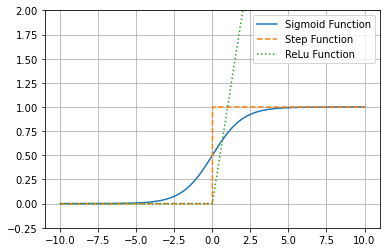

In [3]:
X = np.arange(-10.0, 10.0, 0.001)
Y_sig = sigmoid(X)
Y_step = step_function(X)
Y_Relu = Relu(X)
plt.plot(X, Y_sig,label='Sigmoid Function')
plt.plot(X, Y_step,linestyle='--',label='Step Function')
plt.plot(X, Y_Relu,linestyle=':',label='ReLu Function')
plt.legend()
plt.ylim((-0.25,2))
plt.grid(True)
plt.show()

# pytorch.Activation

-  torch.sigmoid()
-  torch.relu()
-  torch.rrelu()
-  torch.tanh()
-  torch.selu()
- torch.nn.functional.softplus()

In [1]:
# pytorch.Activation


X = np.arange(-5.0, 5.0, 0.01)
plt.figure(figsize=(12,6))


NameError: name 'plt' is not defined

---

<img srcset="https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&amp;fname=http%3A%2F%2Fcfile27.uf.tistory.com%2Fimage%2F99C5833D5B3F1FBF0A165B" src="https://t1.daumcdn.net/cfile/tistory/99C5833D5B3F1FBF0A" style="cursor: pointer;max-width:100%;height:auto" width="500" height="314" filename="캡처19.PNG" filemime="image/jpeg">

In [5]:
# Data
from sklearn.datasets import make_blobs

n_samples=1000
n_features=2
X, y = make_blobs(n_samples=n_samples, centers=2, n_features=n_features, random_state=42)

print('Class label counts:', np.bincount(y))
print('X.shape:', X.shape)
print('y.shape:', y.shape)

Class label counts: [500 500]
X.shape: (1000, 2)
y.shape: (1000,)


In [6]:
# train_test_split 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

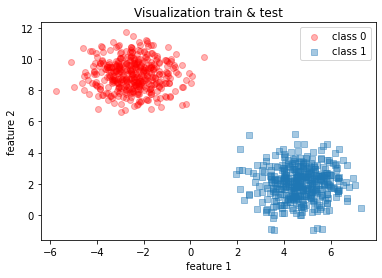

In [7]:
# Visualization with matplotlib
plt.title('Visualization train & test')
plt.scatter(X_train[y_train==0,:][:,0], X_train[y_train==0,:][:,1], label='class 0', marker='o',color='r', alpha=0.3)
plt.scatter(X_train[y_train==1,:][:,0], X_train[y_train==1,:][:,1], label='class 1', marker='s', alpha=0.4)
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.legend()
plt.show()

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Dataset and DatasetLoader

In [9]:
import torch
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from sklearn.datasets import make_blobs

class MyDataset(Dataset):
    def __init__(self,X,y,n_samples=1000, n_features=2):
        self.X, self.y = torch.Tensor(X),torch.Tensor(y.reshape(n_samples,1)) 

    def __len__(self):
        return len(self.X)
    
    def __getitem__(self,idx):
        _x = torch.FloatTensor(self.X[idx])
        _y = torch.FloatTensor(self.y[idx])
        return _x, _y

In [10]:
train_dataset = MyDataset(X_train,y_train,len(X_train))
test_dataset = MyDataset(X_test,y_test,len(X_test))

train_dataloader = DataLoader(train_dataset,batch_size=10)
test_dataloader = DataLoader(test_dataset,batch_size=10)

<div class="alert alert-success" data-title="">
  <h1><i class="fa fa-tasks" aria-hidden="true"></i> Exercise : Define the model
  </h1>
</div>

## Model
```
model name : Multiperceptron

Layer1
    1) Fully-connected-layer
    2) Relu
Layer2
    1) Fully-connected-layer
    2) Sigmoid
```

In [11]:
import torch.nn as nn
# TODO 

## Model Compile 

In [13]:
model = Multiperceptron()
# parameter 
# 학습 후 파라미터 확인
print("Parameters after learning: ",[p.data for p in model.parameters()])

Parameters after learning:  [tensor([[ 0.1941,  0.6043],
        [-0.5331, -0.3414],
        [ 0.6884, -0.5243],
        [ 0.6992,  0.6904],
        [-0.2057, -0.0145],
        [ 0.6309,  0.4978],
        [ 0.2243, -0.6336],
        [ 0.6308,  0.6941],
        [ 0.6736,  0.4984],
        [-0.6083, -0.0792]]), tensor([ 0.2163,  0.4190,  0.2638, -0.6769,  0.5765, -0.5155, -0.4946, -0.5012,
        -0.2919, -0.4972]), tensor([[ 0.1963, -0.0037, -0.2290, -0.1230, -0.0731,  0.2400, -0.0615, -0.1623,
          0.2147,  0.1278]]), tensor([-0.2573])]


## Loss and optimizer

In [14]:
# criterion = nn.BCEWithLogitsLoss()
criterion = nn.BCELoss()
from torch import optim
optimizer = optim.SGD(model.parameters(), lr = 1e-4)

## Model Train and Evaluation

In [15]:
train_losses = []
test_losses = []
train_acces = []
test_acces = []


epochs= 100
for epoch in range(epochs):
    train_collect = 0
    
    
    model.train()
    for data, label in train_dataloader:
        optimizer.zero_grad()
        # Forward pass
        y_pred = model(data)
        # Compute Loss
        loss = criterion(y_pred, label)
#         train_losses.append(loss)
        train_predicted = torch.round(y_pred.data) # 확률이 가장 높은 레이블이 무엇인지 계산
        train_collect += train_predicted.eq(label.data.view_as(train_predicted)).sum()
        
        # Backward pass
        loss.backward()
        optimizer.step()
    train_losses.append(loss)     
    train_data_num = len(train_dataloader.dataset)    
    train_acc = 100.*train_collect/train_data_num
    train_acces.append(train_acc.numpy())


    if epoch % 10 == 0:
        print('[TRAIN] Epoch {}: train loss: {}'.format(epoch, loss.item()))
        
    model.eval() # 추론할때는 추론모드로! Dropout이나 Batch-Norm과 같은 기법에선 특히!

    # DataLoader에서 batch_size만큼씩 꺼내서 추론을 수행
    with torch.no_grad(): # 추론할 때는 미분이 필요하지 않기 때문에! backpropagatin이나 gradient 계산 등을 꺼서 memory usage를 줄이고 속도를 높임
        test_collect = 0
        for data, targets in test_dataloader:

            outputs = model(data)
            loss = criterion(outputs, targets)
#             test_losses.append(loss)
            predicted = torch.round(outputs.data) # 확률이 가장 높은 레이블이 무엇인지 계산
            test_collect += predicted.eq(targets.data.view_as(predicted)).sum() # 정답한 일치한 경우 정답 카운트 증가
            
            
    
        # Accuracy
        test_losses.append(loss)
        data_num = len(test_dataloader.dataset) # 데이터 총 건수
        test_acc = 100.*test_collect/data_num
        test_acces.append(test_acc.numpy())
        
    if epoch % 10 == 0:
        print(f'[TEST] Epoch {epoch} \t Accuracy: {test_collect}/{data_num} ({100.*test_collect/data_num :3.5f}%)')

[TRAIN] Epoch 0: train loss: 0.8727530241012573
[TEST] Epoch 0 	 Accuracy: 73/200 (36.50000%)
[TRAIN] Epoch 10: train loss: 0.5850651264190674
[TEST] Epoch 10 	 Accuracy: 184/200 (92.00000%)
[TRAIN] Epoch 20: train loss: 0.43825024366378784
[TEST] Epoch 20 	 Accuracy: 200/200 (100.00000%)
[TRAIN] Epoch 30: train loss: 0.34009498357772827
[TEST] Epoch 30 	 Accuracy: 200/200 (100.00000%)
[TRAIN] Epoch 40: train loss: 0.27056899666786194
[TEST] Epoch 40 	 Accuracy: 200/200 (100.00000%)
[TRAIN] Epoch 50: train loss: 0.22043628990650177
[TEST] Epoch 50 	 Accuracy: 200/200 (100.00000%)
[TRAIN] Epoch 60: train loss: 0.18411381542682648
[TEST] Epoch 60 	 Accuracy: 200/200 (100.00000%)
[TRAIN] Epoch 70: train loss: 0.15719087421894073
[TEST] Epoch 70 	 Accuracy: 200/200 (100.00000%)
[TRAIN] Epoch 80: train loss: 0.13658960163593292
[TEST] Epoch 80 	 Accuracy: 200/200 (100.00000%)
[TRAIN] Epoch 90: train loss: 0.12029784917831421
[TEST] Epoch 90 	 Accuracy: 200/200 (100.00000%)


## Visulization

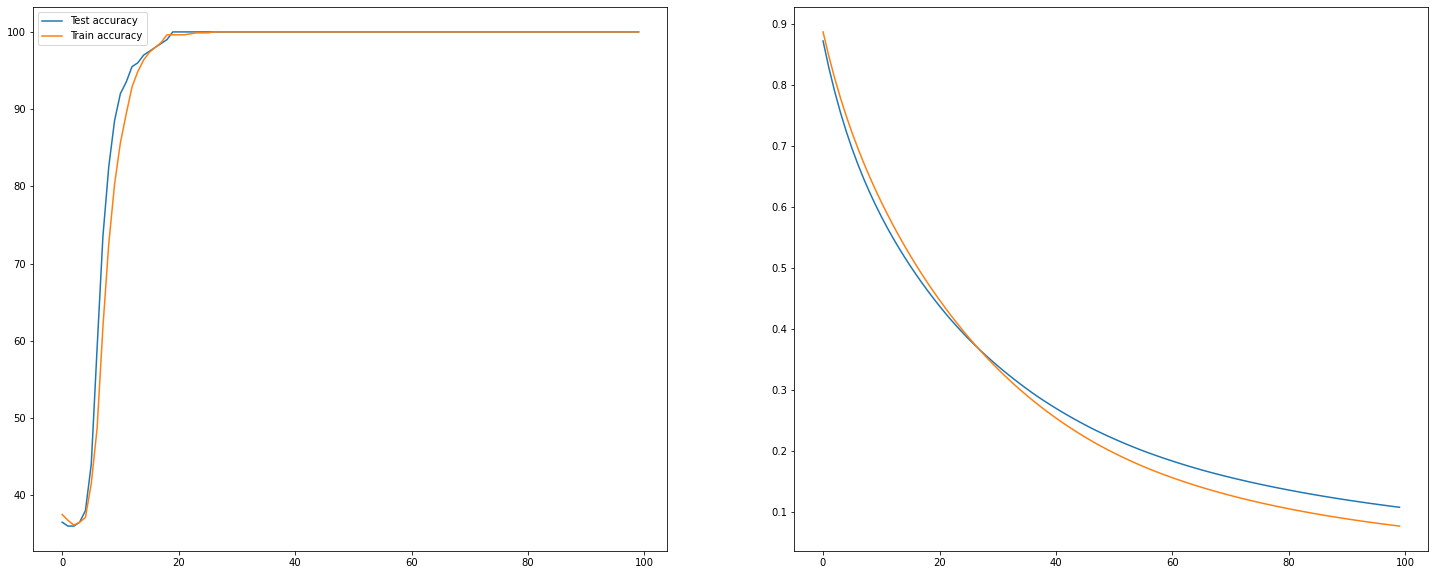

In [16]:
plt.figure(figsize=(25,10))
plt.subplot(1,2,1)
plt.plot(test_acces,label='Test accuracy')
plt.plot(train_acces,label='Train accuracy')
plt.legend()
plt.subplot(1,2,2)
plt.plot(train_losses)
plt.plot(test_losses)
plt.show()